## Motivation and Summary

Cities around the Sunbelt have been among the fastest-growing in the US:
https://www.usatoday.com/story/money/2019/05/09/americas-fastest-growing-cities/39442201/

And Nashville is no exception. In fact it's often billed as a 'superstar' city with exemplary economic development that other cities strive for. 

https://www.reuters.com/article/us-usa-economy-nashville-insight/as-u-s-superstar-cities-thrive-weaker-ones-get-left-behind-idUSKCN1UE13B

Like all major Sunbelt cities, it followed a sprawled, "donut" development pattern post-WW2 consisting of primarily suburban growth while the city center declined. Post-Recession growth has been the opposite, seeing far-out "exurb" properties decline while city center development transforms once-neglected, historic neighborhoods.
In this project we want to determine which neighborhoods are experiencing the most growth, and what might be driving that growth. Hopefully this will tell us which neighborhood is ripe for development (or decline). 

https://www.governing.com/gov-data/nashville-gentrification-maps-demographic-data.html

The sudden rush of people to formerly-neglected city centers has created some undesirable effects such as increased housing prices, and raised concerns over gentrification in historically working-class neighborhoods. Currently the housing market is tight in our hottest cities, leading to a housing crisis.
https://www.tennessean.com/story/opinion/columnists/david-plazas/2018/07/13/affordable-housing-nashville-urban-crisis-grows-more-severe/777899002/

Importantly, it's common that gentrification complaints are much ado about nothing. Research has failed to find much displacement caused by gentrification in America, and this could mean that urban house prices are, in general, not rising very fast.

https://www.planetizen.com/blogs/105866-gentrification-mania

# To-Dos:

### Try to find a neighborhood with a lot of mid-rise and examine it.
### Find the neighborhood with the highest % 'PLEX' (similar to mid-rise)
### Find how to rotate labels on plots where they overlap

Questions:

* What correlates with high housing prices?
    * Distance from city center? 
    * Neighborhood composition of the buildings (a lot of multi-family or mixture of uses leads to higher PPSF)?
    * Water fixtures
    
* What kind of neighborhoods experience multi-parcel sales?

* How do housing prices change over time?

* How does square footage correlate with price?

* Does population density correlate with price?

* How does price per square acre differ from price per square foot?

## Observations:

Multifamily is usually listed with a 'Land Area' of 0.

Condos/apartments, no matter how tall their building, are listed with a height of 1 :/

From what I can tell, all areas near downtown (east, north and west) are gentrifying. The South side was already middle-class.
https://www.wkrn.com/news/nashville-2019/gentrification-is-having-mixed-impact-in-east-nashville-neighborhoods/
https://tntribune.com/investigative-stories/gentrification-in-north-nashville/

## Zones for reference:
Note that each zone (except 5) has a part touching downtown then spreads out
![title](http://www.padctn.org/sales/Zones/county_by_zone.gif)

## Zipcodes for Reference
This image is large, but I like the detail. 

![title](https://sellinginspiredhomes.com/wp-content/uploads/2017/10/Zip-Code-Davidson-Co-1024x835.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df1=pd.read_csv('nashville_20190903173657.csv', parse_dates = ['Most Recent Sale Date', 'Sale Date'], dtype={'Zone': str, 'Neighborhood': str})

/home/drew/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.head()

,Assessment Classification*,Assessment Improvement,Assessment Land,Assessment Total,Assessment Year,Baths,Baths2,Beds,Beds2,Building Condition,...,Assessment Improvement Improved,Most Recent Sale Price Improved,Improvement Value Improved,Assessment Total Improved,Land Value Improved,Assessment Land Improved,Total Appraisal Value Improved,Square Footage Improved,Building Type Custom,Land Area Acres
0,AG/RES,$0,"$2,655","$2,655",2019.0,NaN,NaN,NaN,NaN,NaN,...,2655.0,7500.0,0.0,2655.0,10621.0,2655.0,10621.0,0.0,NaN,7.60
1,AG/RES,$0,"$4,081","$4,081",2019.0,NaN,NaN,NaN,NaN,NaN,...,4081.0,12500.0,0.0,4081.0,16323.0,4081.0,16323.0,0.0,NaN,8.90
2,EXE,$0,$0,$0,2019.0,NaN,NaN,NaN,NaN,NaN,...,0.0,67000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.90
3,EXE,$0,$0,$0,2019.0,2.0,NaN,3.0,NaN,Poor,...,0.0,67000.0,34800.0,0.0,12300.0,0.0,47100.0,1224.0,SINGLE FAM,0.79
4,EXE,$0,$0,$0,2019.0,NaN,NaN,NaN,NaN,NaN,...,0.0,67000.0,0.0,0.0,27400.0,0.0,27400.0,0.0,NaN,2.11


In [4]:
#Correcting badly-entered data
df1.loc[176025, 'Sale Price'] = 37000
df1.loc[27056, 'Sale Price'] = 161000
df1.loc[191004, 'Sale Price'] = 810000
df1.loc[239278, 'Sale Price'] = 280395
df1.loc[138891, 'Sale Price'] = 200000
df1.loc[241961, 'Sale Date'] = '2019-03-04'
df1.loc[241961, 'Sale Date'] = pd.to_datetime(df1.loc[241961, 'Sale Date'])
df1.loc[241961, 'Sale Price'] = 370000
df1.loc[230115, 'Sale Price'] = 325000
df1.loc[53151, 'Sale Price'] = 310900
df1.loc[259815, 'Sale Price'] = 1513142
df1.loc[129682, 'Sale Price'] = 1300000
df1.loc[154271, 'Square Footage Improved'] = 10094
df1.drop(190142, inplace=True) #Has a massive ADU ~4 times the size of the 'main' structure. Main struct is low-grade, ADU is luxury.
df1.drop(128094, inplace=True) #Can't find out anything about this house. Improbably large sqft and acreage, low price.

In [5]:
#Creating new dataframe without duplicate entires
df=df1.sort_values(by='Sale Date').drop_duplicates(subset='Map & Parcel', keep = 'last')
#Dropping parcels that were involved in multi-parcel sales
df=df[df['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df['PPS']=df['Sale Price']/df['Square Footage Improved']
df['PPS']=df['PPS'].replace(np.inf, np.nan)
meanpps=df.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)
#Testing the averaged assessment ratio idea.
df['Assessment Ratio'] = df['Assessment Land Improved'] / df['Total Appraisal Value Improved']
nbhdratio=df.groupby('Neighborhood')['Assessment Ratio'].mean().to_frame().rename(columns={'Assessment Ratio':'Nbhd Ratio'})
df=df.merge(nbhdratio, how='left', left_on = 'Neighborhood',right_index=True)
df['Month']= df['Sale Date'].dt.month
df['Quarter'] = df['Sale Date'].dt.quarter
df['Year'] = df['Sale Date'].dt.year
#df = df[(df.Neighborhood != '9527') & (df.Neighborhood != '9026')]
df['Building Grade']= df['Building Grade'].str.replace(r'\w\w\w', '').dropna()

## Examining PPS (our target variable)

In [6]:
df.nlargest(10,'PPS')['Location']
#Largest PPS parcel is a large parcel of land next to Bel Meade, on top of a hill, with a tiny shack on it.

126203               7315 SONYA DR
70794               1401 4TH AVE N
249928    600 12TH AVE S Unit 2216
279746     515 CHURCH ST Unit 4502
93320               300 35TH AVE N
261248    1212 LAUREL ST Unit 2303
279614     515 CHURCH ST Unit 3406
261255    1212 LAUREL ST Unit 2307
106716               6012 HILL CIR
279628     515 CHURCH ST Unit 3506
Name: Location, dtype: object

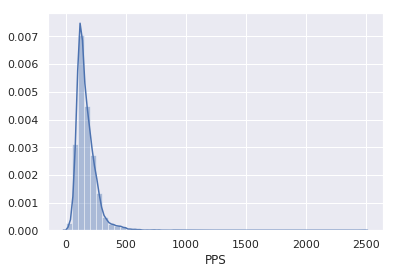

In [7]:
sns.distplot(df['PPS'].dropna())

In [8]:
df['PPS'].describe()

count    54364.000000
mean       170.046728
std         84.642118
min          4.857212
25%        115.965059
50%        150.669830
75%        205.817694
max       2486.282579
Name: PPS, dtype: float64

In [9]:
df['PPS'].quantile([.9, .95, .999])

0.900    266.203704
0.950    312.876534
0.999    773.177924
Name: PPS, dtype: float64

Text(0.5, 1.0, 'Median PPS Over Time')

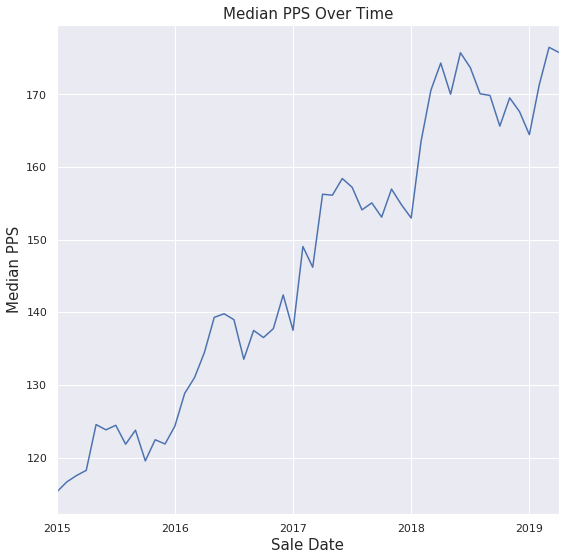

In [10]:
#Plotting average PPS per month
df.groupby(df['Sale Date'].dt.to_period('M'))['PPS'].median().plot(figsize=(9,9))
plt.ylabel('Median PPS', fontsize=15)
plt.xlabel('Sale Date', fontsize=15)
plt.title('Median PPS Over Time', fontsize=15)
#Look for luxury development completed in Jan 2018

Text(0.5, 1.0, 'Median Sale Price Over Time')

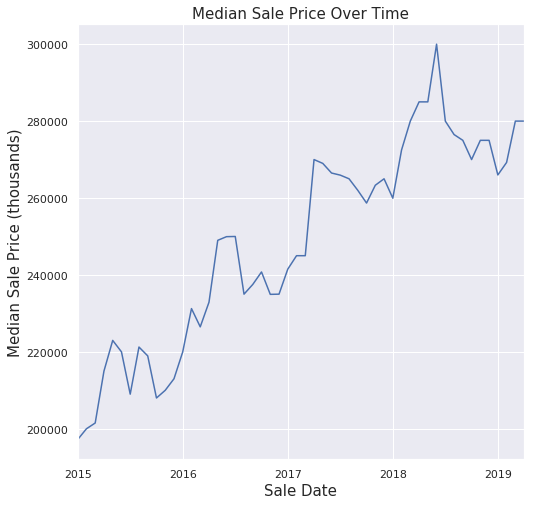

In [11]:
#Plotting median sale price to compare to PPS
df.groupby(df['Sale Date'].dt.to_period('M'))['Sale Price'].median().plot(figsize=(8,8))
plt.xlabel('Sale Date', fontsize=15)
plt.ylabel('Median Sale Price (thousands)', fontsize=15)
plt.title('Median Sale Price Over Time', fontsize=15)

Text(0.5, 1.0, 'Sale Count by Month')

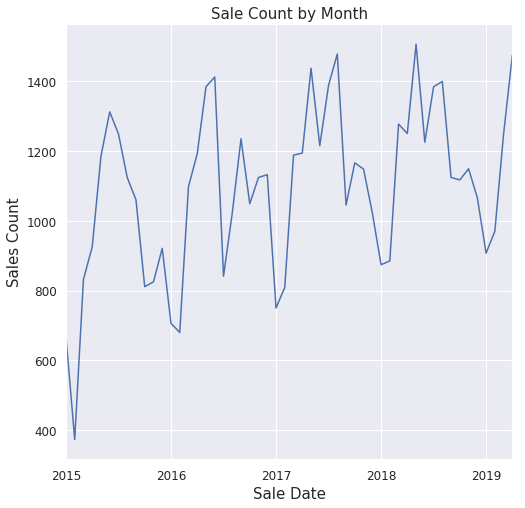

In [12]:
#Plotting Sale Count to see if there's any correlation
#Note that sale price correlates with the sale volume (exhibits similar seasonality)
df.groupby(df['Sale Date'].dt.to_period('M'))['Sale Price'].count().plot(fontsize=12, figsize=(8,8))
plt.ylabel('Sales Count', fontsize=15)
plt.xlabel('Sale Date', fontsize=15)
plt.title('Sale Count by Month', fontsize=15)
#Check against another city or housing index, MLS has publicly available data and Redfin to see if the pattern is normal

### Let's examine how PPS is distributed over the *Zones*:

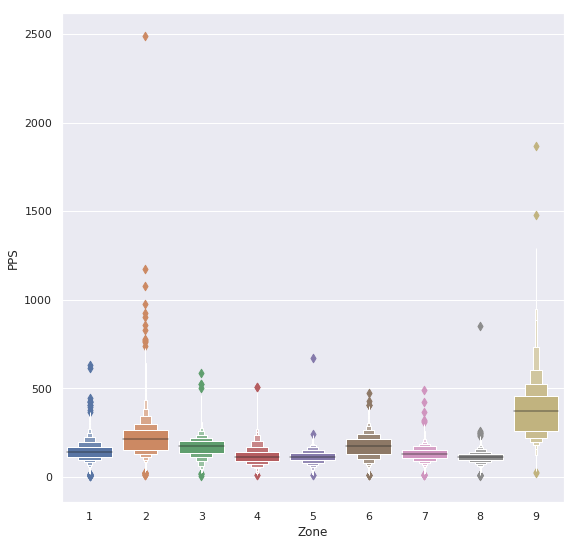

In [13]:
plt.figure(figsize=(9,9))
sns.boxenplot(x= 'Zone', y = 'PPS', data = df)
#Zones 2 and 9 are the clear winners here while 4 and 8 are the lowest.

In [14]:
### Let's examine how PPS is distributed over the *neighborhoods*:
First, how many neighborhoods are there?

Object `there` not found.


In [15]:
len(df['Neighborhood'].unique())
#This will be pretty granular. We should consider trends among Zones as well.

819

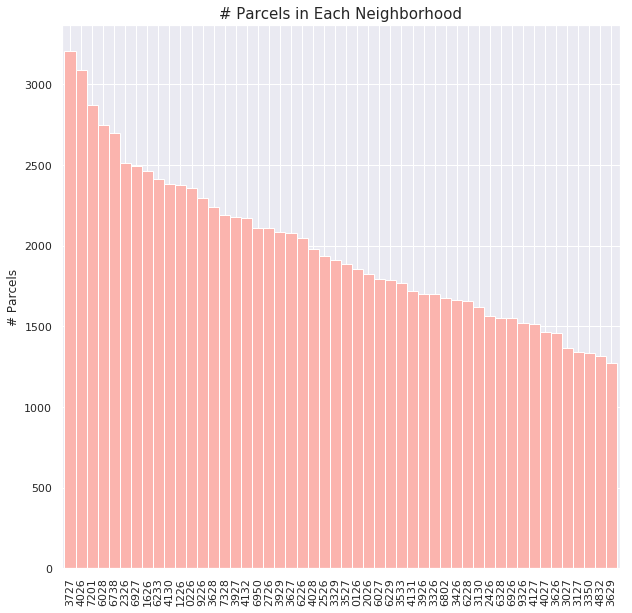

In [16]:
plt.figure(figsize=(10,10))
df1.Neighborhood.value_counts()[:50].plot('bar',colormap='Pastel1', width = 1)
plt.title("# Parcels in Each Neighborhood", fontsize=15)
plt.ylabel('# Parcels')
plt.show()
#Nice even class distribution

In [17]:
df['NeighborhoodPPS'].describe()

count    56854.000000
mean       170.939468
std         70.440347
min         35.235169
25%        122.348461
50%        149.653266
75%        198.877411
max        778.711485
Name: NeighborhoodPPS, dtype: float64

Text(0.5, 1.0, 'Distribution of Average PPS across Neighborhoods')

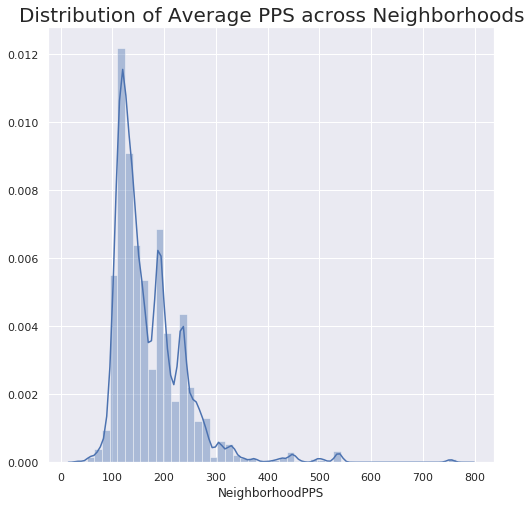

In [18]:
#Let's take a closer look at Average PPS by Neighborhood
plt.figure(figsize=(8,8))
sns.distplot(df['NeighborhoodPPS'].dropna())
plt.title('Distribution of Average PPS across Neighborhoods', fontsize=20)

In [19]:
#The most expensive neighborhoods
meanpps.nlargest(10,'NeighborhoodPPS')

,NeighborhoodPPS
Neighborhood,
3211,778.711485
6264,752.879821
6442,536.781227
6375,523.752618
4267,506.597339
4098,495.971656
6444,463.819647
4264,449.984079
4262,444.942479


In [20]:
#Priciest nbhd in the (df) dataset. Note how incredibly diverse the building types are.
df3211 = df1[df1.Neighborhood == '3211']
df3211['Building Type'].value_counts()

OFFICE          58
RETAIL/SHPG     50
BANK            16
MED OFC         14
REST/BAR         8
APARTMENT        6
PARK'G GAR       4
SINGLE FAM       4
MARKET           3
HOTEL            3
NURSING HOME     3
FAST FOOD        3
DEPT STORE       2
DRUG STORE       2
ELDERLY HSG      2
GROCERY/SMKT     2
CINEMA           1
CHURCH           1
LAUNDRY          1
DAYCARE          1
HIGHRISE APT     1
Name: Building Type, dtype: int64

In [21]:
#9026 contains the highest PPS observations.
df9026= df[df['Neighborhood']=='9026']
df9026.nlargest(10, 'PPS')\
[['PPS', 'Sale Date', 'Zone', 'Year Built', 'Location', 'Square Footage Improved', 'Sale Price']]\
.sort_values(by='PPS', ascending = False)
#LOriginally this neighborhood had a lot of guest houses throwing off our metrics. The problem is now resolved.

,PPS,Sale Date,Zone,Year Built,Location,Square Footage Improved,Sale Price
130234,901.604430,2018-03-01 00:00:00,2,2016.0,511 BELLE MEADE BLVD,7043.0,6350000.0
148381,829.596413,2019-03-25 00:00:00,2,1930.0,600 LYNNWOOD BLVD,1115.0,925000.0
130296,597.510373,2018-08-01 00:00:00,2,2003.0,428 WESTVIEW AVE,6025.0,3600000.0
149232,504.613610,2018-05-15 00:00:00,2,1949.0,408 W BROOKFIELD AVE,6936.0,3500000.0
129629,499.122422,2019-04-10 00:00:00,2,1918.0,417 WESTVIEW AVE,4558.0,2275000.0
128871,494.264627,2018-05-02 00:00:00,2,2011.0,201 LYNNWOOD BLVD,5623.0,2779250.0
129580,484.348834,2018-07-13 00:00:00,2,1937.0,411 ELLENDALE AVE,7763.0,3760000.0
149245,469.672157,2019-04-12 00:00:00,2,2019.0,403 W BROOKFIELD AVE,3825.0,1796496.0
149353,467.996140,2017-05-26 00:00:00,2,1942.0,4415 TYNE BLVD,6218.0,2910000.0
130235,464.702393,2018-04-18 00:00:00,2,1929.0,515 BELLE MEADE BLVD,5057.0,2350000.0


In [22]:
df9026[['Location', 'Sale Price', 'PPS', 'Zone']].head(10)
#This is a neighborhood of huge houses, probably owned by country musicians. 
#It's called "Belle Meade" in SW Nashville
#Zone 2 is the highest-population zone and the priciest.

,Location,Sale Price,PPS,Zone
129482,306 JACKSON BLVD,660000.0,158.653846,2
148365,605 LYNNWOOD BLVD,892000.0,227.667177,2
129654,332 WALNUT DR,532500.0,153.946227,2
128812,105 BELLE MEADE BLVD,3100000.0,395.711003,2
148400,615 WESTVIEW AVE,1475000.0,190.298026,2
130344,4324 SIGNAL HILL DR,986000.0,244.665012,2
148323,4312 SUNNYBROOK DR,400000.0,343.642612,2
149400,807 LYNNWOOD BLVD,515000.0,198.000769,2
149394,907 LYNNWOOD BLVD,505000.0,248.768473,2
129674,404 LYNNWOOD BLVD,700000.0,107.609531,2


In [23]:
df9026.describe()
#Mean sale price of #1.44 million, mean PPS of $609.  

,Assessment Year,Baths,Baths2,Beds,Beds2,Fixtures,Fixtures2,Half Bath,Half Bath2,Number of Living Units,...,Total Appraisal Value Improved,Square Footage Improved,Land Area Acres,PPS,NeighborhoodPPS,Assessment Ratio,Nbhd Ratio,Month,Quarter,Year
count,237.0,225.000000,24.000000,225.000000,24.000000,225.000000,23.000000,224.000000,24.0,225.0,...,2.370000e+02,237.000000,237.000000,225.000000,2.370000e+02,237.000000,2.370000e+02,237.000000,237.000000,237.000000
mean,2019.0,4.204444,1.125000,4.311111,0.833333,18.142222,5.130435,0.723214,0.0,1.0,...,1.618687e+06,4942.164557,1.114515,305.287534,3.052875e+02,0.136330,1.363300e-01,6.274262,2.405063,2016.780591
std,0.0,1.333958,0.536697,0.968758,0.701964,5.659793,1.866069,0.833275,0.0,0.0,...,8.382891e+05,2307.854683,0.952674,102.347596,9.114196e-13,0.048224,3.337718e-16,3.346623,1.091403,1.249730
min,2019.0,1.000000,0.000000,1.000000,0.000000,5.000000,2.000000,0.000000,0.0,1.0,...,2.080000e+04,0.000000,0.250000,61.258705,3.052875e+02,0.051373,1.363300e-01,1.000000,1.000000,2015.000000
25%,2019.0,3.000000,1.000000,4.000000,0.000000,14.000000,4.500000,0.000000,0.0,1.0,...,1.017400e+06,3713.000000,0.640000,250.069080,3.052875e+02,0.097997,1.363300e-01,4.000000,2.000000,2016.000000
50%,2019.0,4.000000,1.000000,4.000000,1.000000,18.000000,5.000000,1.000000,0.0,1.0,...,1.414300e+06,4785.000000,0.920000,305.535586,3.052875e+02,0.129465,1.363300e-01,6.000000,2.000000,2017.000000
75%,2019.0,5.000000,1.000000,5.000000,1.000000,22.000000,5.000000,1.000000,0.0,1.0,...,2.012300e+06,6218.000000,1.190000,346.441948,3.052875e+02,0.161850,1.363300e-01,9.000000,3.000000,2018.000000
max,2019.0,7.000000,3.000000,7.000000,3.000000,32.000000,11.000000,3.000000,0.0,1.0,...,5.298700e+06,14143.000000,8.900000,901.604430,3.052875e+02,0.250000,1.363300e-01,12.000000,4.000000,2019.000000


In [24]:
#Second-priciest Neighborhood. Any similarities?
df6264 = df[df.Neighborhood == '6264']
df6264['Building Type'].value_counts()
#Average sale price of $742.4k
#The only thing in this neighborhood is a giant condo tower called 1212
#This is possibly the reason for the spike in price early 2019.

HRISE CONDO    76
Name: Building Type, dtype: int64

## Examining Zone-wide trends:
Why are Zone 9 and Zone 2 pricier? Why are 4 and 8 the cheapest?
Notice that Zone 9 has the lowest count. Does that mean there's development potential?

2    66702
1    48119
6    44224
8    36232
7    29560
3    18145
4    15372
5    12161
9     8700
Name: Zone, dtype: int64


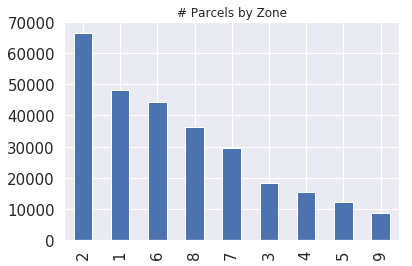

In [25]:
df1.Zone.value_counts().plot('bar', title= '# Parcels by Zone', fontsize=15)
print(df1.Zone.value_counts())

Text(0.5, 1.0, 'Building Types by Zone')

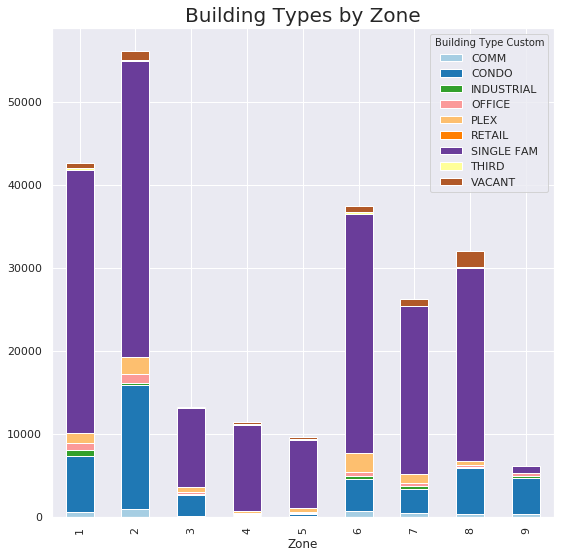

In [26]:
pd.crosstab(df1.Zone,df1['Building Type Custom']).plot(kind='bar',stacked=True, colormap='Paired', figsize=(9,9))
plt.title('Building Types by Zone', fontsize=20)

#At first glance, Zones 2 and 9 have the most diverse mix of building types, but we need to numerically verify it.

#I really want to make pie charts that show the % of each building type for different zones and neighborhoods.
#But I'm having some technical difficulty. We need to cover that on Sunday or Thursday.

Text(0.5, 1.0, 'Year Built Distribution by Zone')

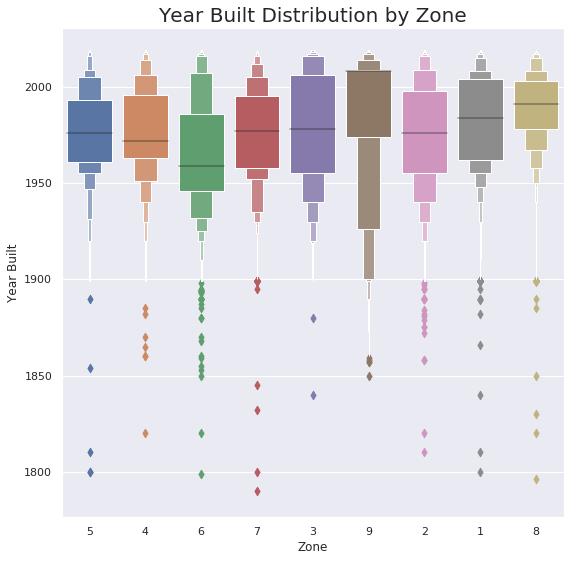

In [27]:
plt.figure(figsize=(9,9))
sns.boxenplot(x="Zone", y="Year Built", data=df1)
plt.title('Year Built Distribution by Zone', fontsize=20)
#Zone 6 is showing the broadest range of values and the oldest. Perhaps it experienced gentrification at times in the past.
#Zone 9 shows the most recently-built units, but with lots of old historic stuff.
#Zone 8 shows the 2nd-most recent distribution of homes. This would reflect east nashville gentrifying.

Text(0.5, 1.0, 'PPS Distribution Among Zones')

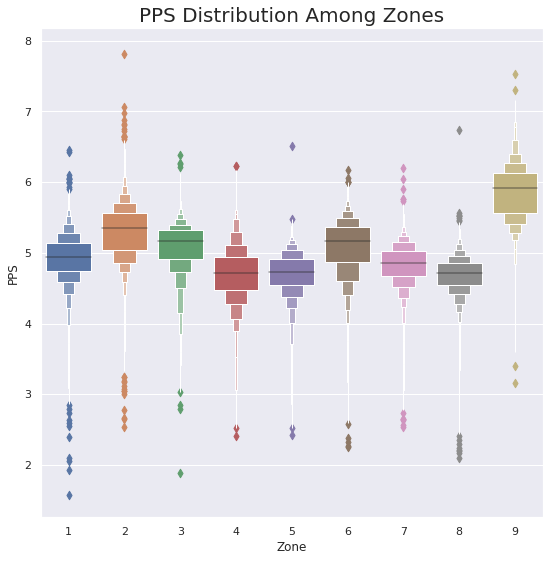

In [28]:
plt.figure(figsize=(9,9))
sns.boxenplot(x="Zone", y=np.log(df["PPS"]), data=df)
plt.title("PPS Distribution Among Zones", fontsize=20)
#Zone 9, the downtown, shows the highest PPS

## Examining Zone 2
This is by far the largest zone, it also has the priciest neighborhoods.

(66702, 68)


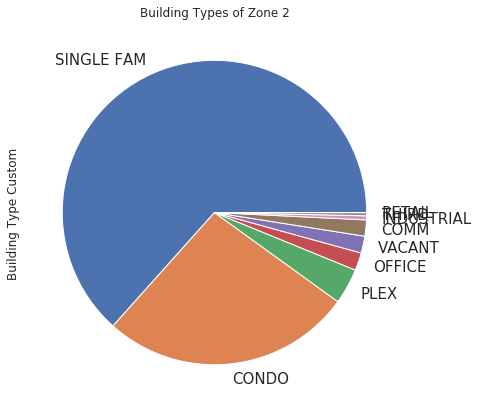

In [30]:
dfz2=df1[df1.Zone=='2']
dfz2['Building Type Custom'].value_counts().plot('pie', title = 'Building Types of Zone 2',figsize=(7,7), fontsize=15)
print(dfz2.shape)
#So a largely suburban zone, but I'm guessing it has a mini-downtown somewhere.

Text(0.5, 1.0, 'Year Built of Buildings in Zone 2')

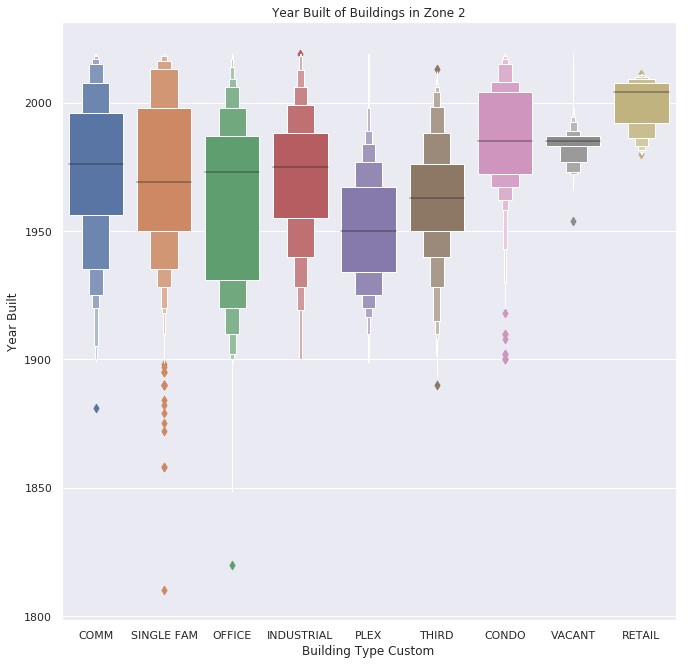

In [31]:
#When were the houses in Zone 2 built, and what type?
#Do newer buildings tend to be of a certain type?
plt.figure(figsize=(11,11))
sns.boxenplot(y=dfz2['Year Built'],x=dfz2['Building Type Custom'])
plt.title('Year Built of Buildings in Zone 2')
#Clearly there's been a lof ot retail, condo, commerical, and even single-family development there lately.
#Big lack of PLEX

## Examining Zone 9 (downtown)

CONDO         4418
SINGLE FAM     770
OFFICE         345
COMM           344
INDUSTRIAL     186
PLEX            86
THIRD           37
VACANT          14
RETAIL           1
Name: Building Type Custom, dtype: int64 (8700, 68)


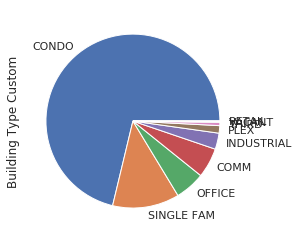

In [32]:
dfz9=df1[df1.Zone=='9']
dfz9['Building Type Custom'].value_counts().plot.pie()
print(dfz9['Building Type Custom'].value_counts(), dfz9.shape)
#Big mix of building types

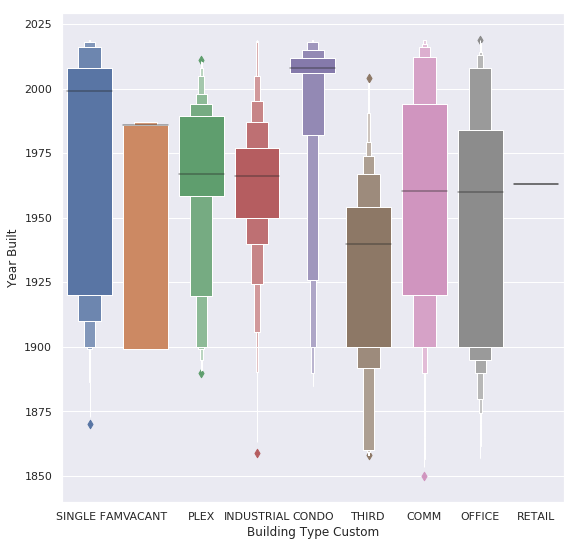

In [33]:
#When were the different building types constructed?

plt.figure(figsize=(9,9))
sns.boxenplot(y='Year Built', x = 'Building Type Custom', data = dfz9)
#Single family is the newest here.
#PLEX is the oldest

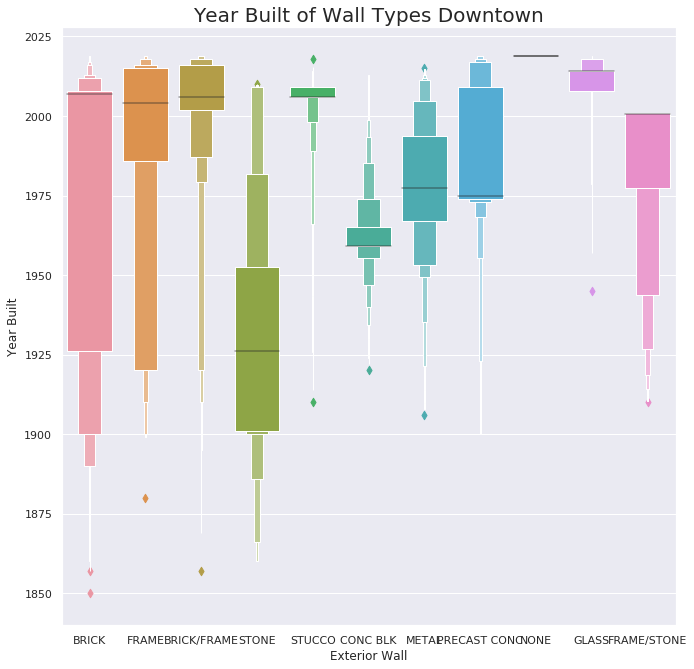

In [34]:
#Was there a trend in glass skyscrapers?
plt.figure(figsize=(11,11))
plt.title('Year Built of Wall Types Downtown', fontsize=20)
sns.boxenplot(x='Exterior Wall', y = 'Year Built', data = dfz9)

## Examining Zone 8
The lowest PPS zone. Notably it surrounds a lake to the southeast of Nashville.

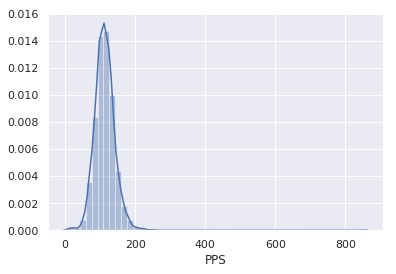

In [35]:
dfz8=df[df['Zone']=='8']

sns.distplot(dfz8.PPS.dropna())

In [36]:
df1z8=df1[df1['Zone']=='8']
df1z8['Building Type'].value_counts()
#If I were to guess, I'd say there's a small mini-downtown here as well.

SINGLE FAM      23205
RESD CONDO       5465
ZERO LOT         1981
RES DUPLEX        402
OFFICE            196
WAREHOUSE         162
RETAIL/SHPG       109
MODULAR HOME       80
APARTMENT          58
MARKET             51
FAST FOOD          48
CHURCH             48
REST/BAR           33
CLUB/UNION         29
SERV GARAGE        27
R1 DUPLEX          23
MED OFC            20
BUSINESS CTR       19
BANK               15
MOTEL              13
GROCERY/SMKT       12
SALES SHOWRM       11
MINI-WAREHSE       10
HOTEL               9
NURSING HOME        9
LAUNDRY             6
RESD QUADPLX        6
DAYCARE             6
MAINT HANGER        6
MANF PLANT          5
MINI-LUBE           4
DRUG STORE          4
AUDITORIUM          4
LODGE/FRAT'L        3
RESD TRIPLEX        3
TRUCK TERM          3
CAR WASH            3
ELDERLY HSG         3
WHSE RETAIL         2
HEALTH CLUB         2
DISC STORE          2
EQUIP SHED          2
LUMBER              2
DEPT STORE          1
T-HANGER            1
FUNERAL HM

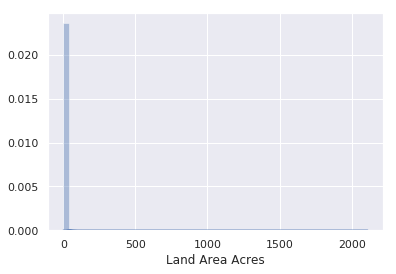

In [37]:
sns.distplot(df1z8['Land Area Acres'].dropna())

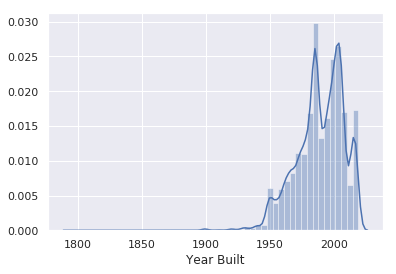

In [38]:
sns.distplot(df1z8['Year Built'].dropna())

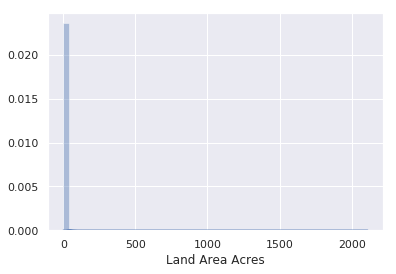

In [39]:
sns.distplot(df1z8['Land Area Acres'].dropna())

## Examining Exterior Wall Types

Might seem like an obscure feature at first glance, but the walls are the most significant part of the building.
Glass is the most expensive per square foot by far. 
Normal 'Frame' (wood/stick frame?) and Brick have significant outliers, probably wealthy SFR.

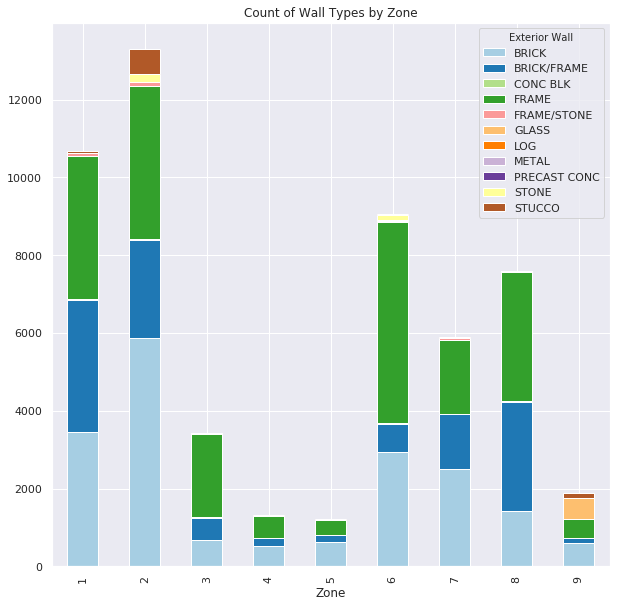

In [40]:
pd.crosstab(df1.Zone,df['Exterior Wall']).plot(kind='bar',stacked=True, colormap='Paired', title = 'Count of Wall Types by Zone', figsize=(10,10))
#Why does Zone 2 have stucco? Also stone. How pricey are they?
#Only Zone 9 has glass.

Text(0.5, 1.0, 'Year Built of Different Wall Types')

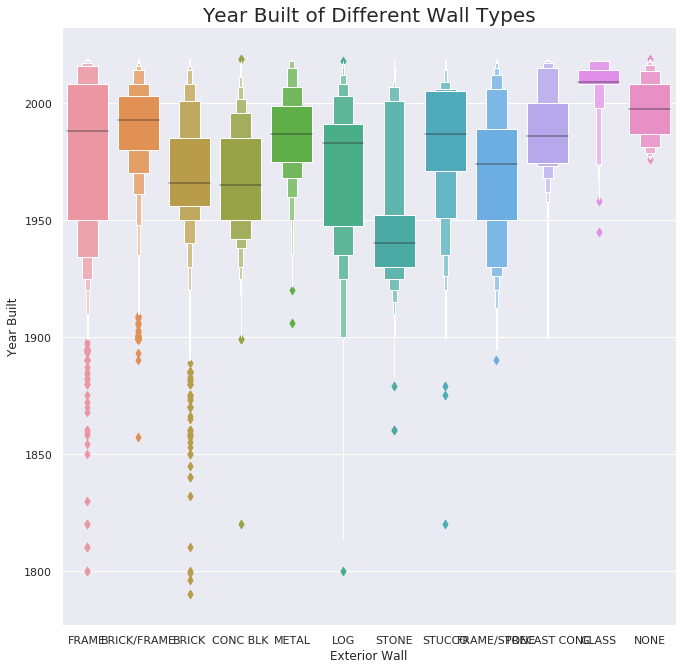

In [41]:
#Was a certain wall type being constructed more recently?
plt.figure(figsize=(11,11))
sns.boxenplot(y=df1['Year Built'],x=df1['Exterior Wall'])
plt.title('Year Built of Different Wall Types', fontsize=20)

Text(0.5, 1.0, 'Price Distribution among Wall Types')

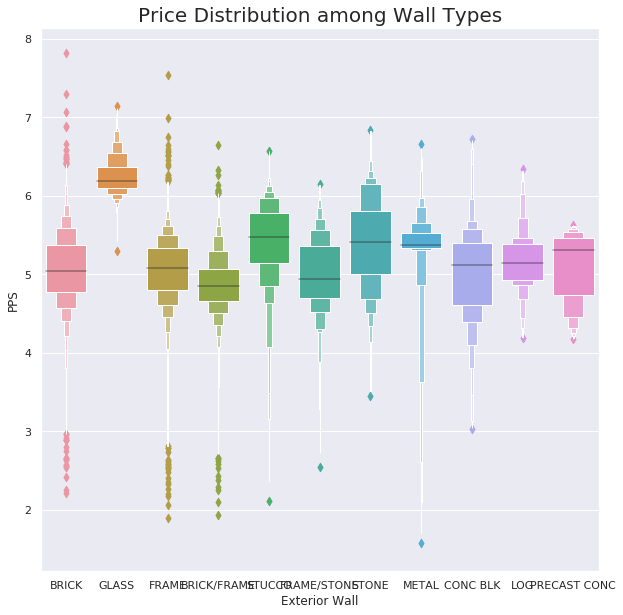

In [42]:
plt.figure(figsize=(10,10))
sns.boxenplot(x="Exterior Wall", y=np.log(df["PPS"]), data=df)
plt.title("Price Distribution among Wall Types", fontsize=20)
#Glass is the most expensive by far, but we see outliers in frame. Probably wealthy SFR houses.

## Examining Roof Types
This feature's distribution is pretty interesting and could prove helpful in predictions.

In [43]:
print(df1['Roof Cover'].value_counts())
#I think we should test this in the ML model. It's probably a good indicator, not specifically of price, but of 
#what kind of neighborhood it is. Maybe neighborhoods with mixtures of building (roof) types experience gentrification.

ASPHALT         195403
TYPICAL          32076
ROLLED            3771
METAL             2481
SLATE              425
UNKNOWN            384
WOOD               319
TILE               317
TAR + GRAVEL       122
Name: Roof Cover, dtype: int64


Text(0.5, 1.0, 'Price Distribution among Roof Types')

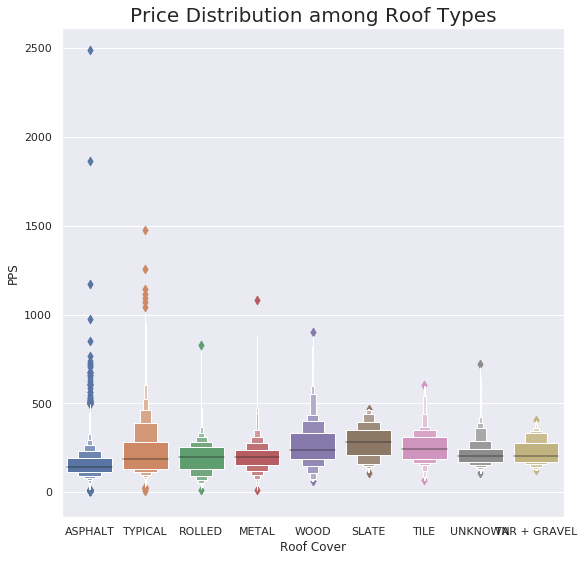

In [44]:
plt.figure(figsize=(9,9))
sns.boxenplot(x='Roof Cover', y = 'PPS', data=df)
plt.title("Price Distribution among Roof Types", fontsize=20)

Text(0, 0.5, '# Houses')

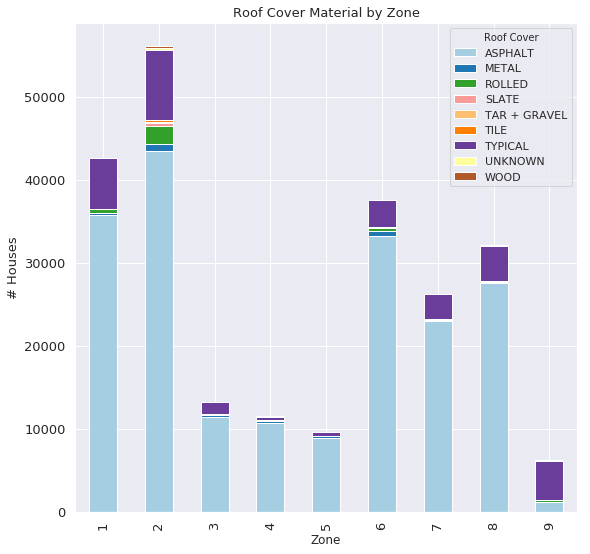

In [45]:
pd.crosstab(df1.Zone,df1['Roof Cover']).plot(kind='bar',stacked=True, colormap='Paired', figsize=(9,9), fontsize=13)
plt.title('Roof Cover Material by Zone', fontsize=13)
plt.ylabel('# Houses', fontsize=13)
#What exactly is 'Typical'?
#Rolled roofing is for cheap houses.

## Examining Building Condition
There's almost always a linear relationship between a building's age and its price (older buildings sell for more). 
However, in some of the boxenplots above, I noticed Zones with older homes were lower-priced.
It's possible the older homes are in disrepair and 'Building Condition' can help explain that.

Text(0, 0.5, '# Houses')

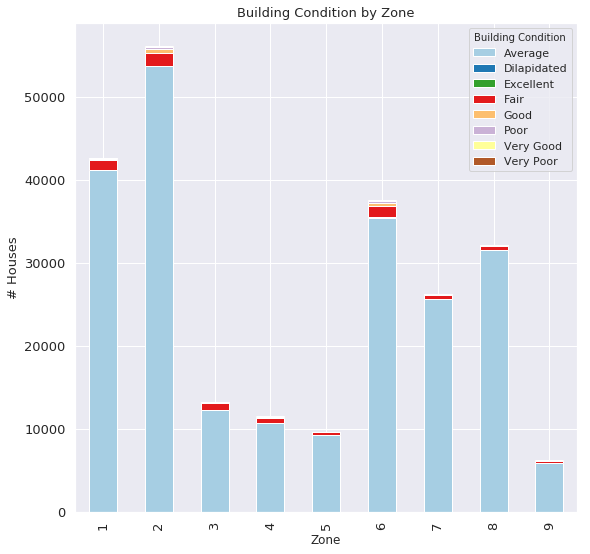

In [46]:
pd.crosstab(df1.Zone,df1['Building Condition']).plot(kind='bar',stacked=True, colormap='Paired', figsize=(9,9), fontsize=13)
plt.title('Building Condition by Zone', fontsize=13)
plt.ylabel('# Houses', fontsize=13)

In [47]:
df['Building Condition'].value_counts()
#I think this kind of class imbalance makes it useful for predictive purposes; if anything's different from 'Average' that's significant

Average        53351
Fair             591
Good             246
Poor              85
Very Good         40
Very Poor         28
Dilapidated       16
Excellent         12
Name: Building Condition, dtype: int64

## The 'Assessment Ratio'

Flirting with the idea of Assessment Improvement / Assessment Total ratio as a good predictor of PPS. Be warned this is only so useful because assessments are done after the property is built and use metrics derived from other data. However *when averaged across the neighborhood* it could show promise. Hypothesis: A neighborhood with low assessment ratio but high population density will get gentrified
    * McMansion neighborhoods will have a high-ish improvement assessment, on cheap land
    * Assessment very much depends on the time it was assessed so we will need to do a time series comparison to get valuable insight.
    * Want to plot meanpps neighborhoods with high assessment ratio

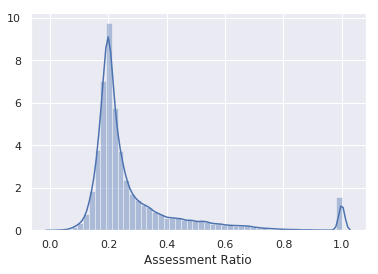

In [48]:
df['Assessment Ratio'] = df['Assessment Improvement Improved'] / df['Assessment Total Improved']
sns.distplot(df['Assessment Ratio'].dropna())

# Examining Correlations

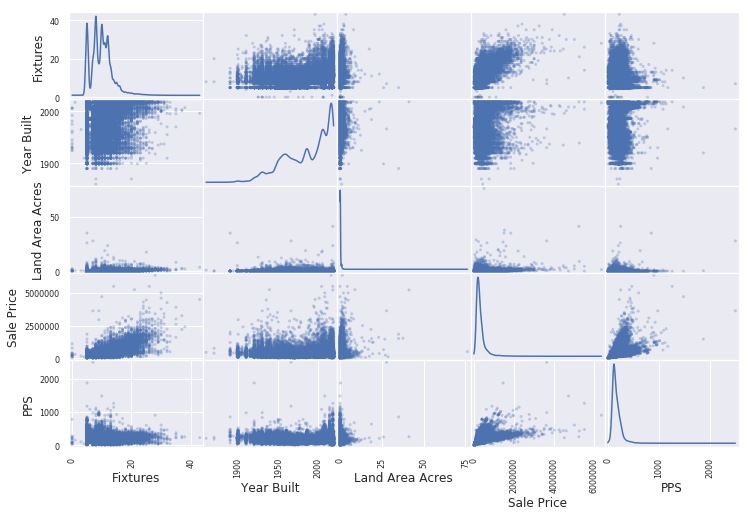

In [49]:
pd.plotting.scatter_matrix(df[['Fixtures','Year Built', 'Land Area Acres','Sale Price', 'PPS', 'Square Footage']], alpha = 0.3,figsize = (12,8), diagonal = 'kde');

In [50]:
df[['Square Footage Improved', 'Most Recent Sale Price Improved', 'PPS', 'Land Area Acres','Baths', 'Beds']].corr()
#No real interesting correlations here except that PPS is pretty strongly correlated with sale price.
#Notably this is on a dataset in which outliers haven't been filtered.

,Square Footage Improved,Most Recent Sale Price Improved,PPS,Land Area Acres,Baths,Beds
Square Footage Improved,1.000000,0.633032,-0.032338,0.159901,0.712640,0.656066
Most Recent Sale Price Improved,0.633032,1.000000,0.477077,0.186548,0.519373,0.351191
PPS,-0.032338,0.477077,1.000000,0.012697,0.000464,-0.219705
Land Area Acres,0.159901,0.186548,0.012697,1.000000,0.118674,0.225147
Baths,0.712640,0.519373,0.000464,0.118674,1.000000,0.581286
Beds,0.656066,0.351191,-0.219705,0.225147,0.581286,1.000000


Text(0.5, 1.0, 'Square Footage vs PPS')

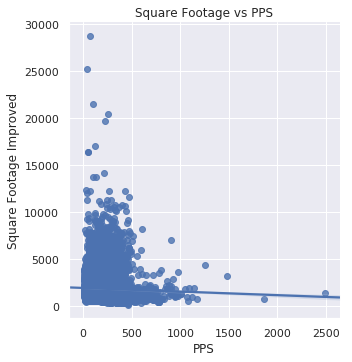

In [51]:
#Square footage is surprisingly the most important feature in predicting PPS in the XGBoost model. 
#Nothing interesting here, but after filtering out a few outliers there may be.
sns.lmplot("PPS", "Square Footage Improved", df)
plt.title("Square Footage vs PPS")
#Slight negative correlation.

## Displaying some other features

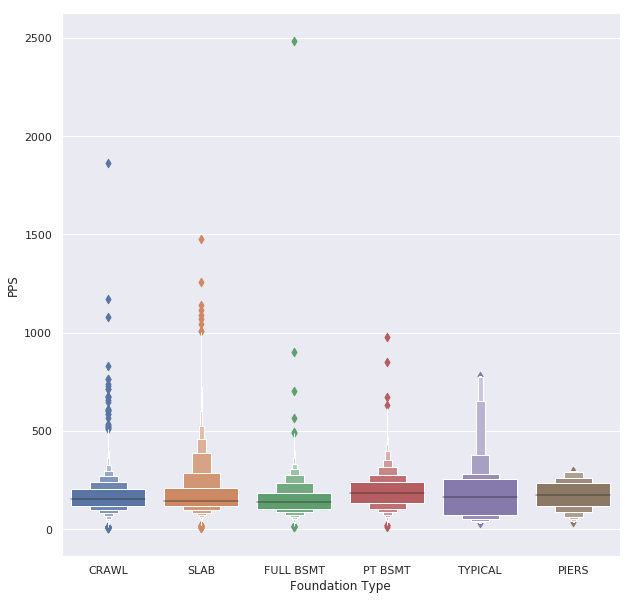

In [52]:
df['Foundation Type'].value_counts()
plt.figure(figsize=(10,10))
sns.boxenplot(x='Foundation Type', y = 'PPS', data=df)
#I wouldn't say there's anything valuable here, but it's good to keep for reference.

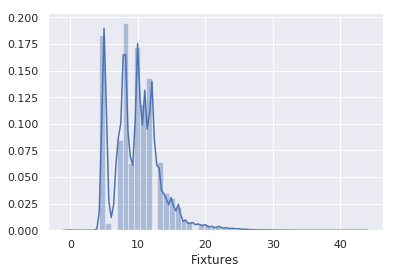

In [53]:
#A Fixture is any water fixture such as a tub, toilet, or sink. It was helpful in the machine learning model for predicting price.
sns.distplot(df['Fixtures'].dropna())

In [54]:
#What is the distribution of Plexes like? Is it linked to higher property values?
plex= df1[df1['Building Type Custom']=='PLEX']
plex['Sale Price'].describe()
#Need to find which neighborhoods have the most plexes.

count    1.439000e+03
mean     3.619308e+05
std      6.241150e+05
min      2.650000e+04
25%      1.450000e+05
50%      2.100000e+05
75%      3.400000e+05
max      6.500000e+06
Name: Sale Price, dtype: float64

In [55]:
df['Building Grade'].value_counts()
#This variable turned out to be useful in prediction, once we cleaned out the 3-letter variants.

C    35611
B    13940
D     1888
A     1837
X      972
E       68
        50
Name: Building Grade, dtype: int64

In [56]:
df['Building Type Custom'].value_counts()
#So Davidson County is largely suburban. But what about the city of Nashville itself?

SINGLE FAM    37994
CONDO         13978
VACANT         1229
PLEX           1116
COMM             21
THIRD            19
OFFICE            7
INDUSTRIAL        2
Name: Building Type Custom, dtype: int64

In [57]:
df['Building Type Custom'][df['Property City']=='NASHVILLE'].value_counts()
#As expected, not quite as suburban. An area graph would help us see the change over time.

SINGLE FAM    25249
CONDO         11002
PLEX            835
VACANT          723
COMM             21
THIRD            15
OFFICE            7
INDUSTRIAL        2
Name: Building Type Custom, dtype: int64

In [58]:
df['Property City'].value_counts(dropna=False)
#Some of these are incredibly rural and I suspect in multiple counties.

NASHVILLE         40025
ANTIOCH            6458
HERMITAGE          3269
MADISON            2333
BRENTWOOD          1561
OLD HICKORY        1487
GOODLETTSVILLE      768
NOLENSVILLE         633
WHITES CREEK        120
MOUNT JULIET        115
NaN                  79
JOELTON              11
UNKNOWN               1
Name: Property City, dtype: int64

In [59]:
df['Tax District'].value_counts()
#I didn't find this feature useful, but it's good to show it.

USD     38371
GSD     15682
GO        680
GBID      498
CBID      459
FH        437
OH        378
BM        252
BH        103
Name: Tax District, dtype: int64

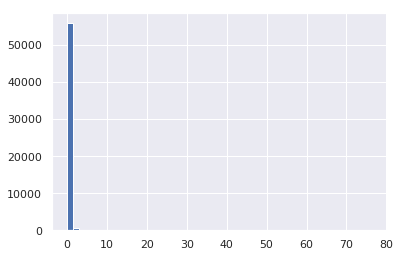

In [60]:
df['Land Area Acres'].hist(bins=50)
#We have some outliers, consider removing
#Important observation: the vast majority of these units are multifamily (land area of 0)

## Examining the lowest-PPS neighborhoods.

In [61]:
df.nsmallest(20,'PPS')[['Neighborhood', 'Zone']]

,Neighborhood,Zone
117379,1426,1
87022,3329,3
266262,6331,1
210028,3926,1
244774,6253,8
158357,3943,1
241964,3930,8
231682,4270,8
182809,6028,8
161373,6036,8


In [62]:
df1426=df1[df1['Neighborhood']=='1426']
df1426.head()

,Assessment Classification*,Assessment Improvement,Assessment Land,Assessment Total,Assessment Year,Baths,Baths2,Beds,Beds2,Building Condition,...,Assessment Improvement Improved,Most Recent Sale Price Improved,Improvement Value Improved,Assessment Total Improved,Land Value Improved,Assessment Land Improved,Total Appraisal Value Improved,Square Footage Improved,Building Type Custom,Land Area Acres
96032,RES,"$23,250","$7,450","$30,700",2019.0,1.0,NaN,3.0,NaN,Average,...,7450.0,48000.0,93000.0,30700.0,29800.0,7450.0,122800.0,1056.0,SINGLE FAM,0.20
96033,RES,"$28,975","$7,450","$36,425",2019.0,2.0,NaN,3.0,NaN,Average,...,7450.0,51784.0,115900.0,36425.0,29800.0,7450.0,145700.0,1008.0,SINGLE FAM,0.16
96034,RES,$0,"$7,450","$7,450",2019.0,NaN,NaN,NaN,NaN,NaN,...,7450.0,2500.0,0.0,7450.0,29800.0,7450.0,29800.0,0.0,NaN,0.14
96035,RES,"$14,925","$10,075","$25,000",2019.0,1.0,NaN,3.0,NaN,Average,...,10075.0,100000.0,59700.0,25000.0,40300.0,10075.0,100000.0,1799.0,SINGLE FAM,0.26
96499,EXE,$0,$0,$0,2019.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,300700.0,0.0,300700.0,0.0,NaN,2.87


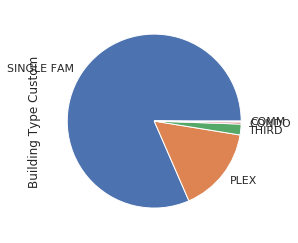

In [63]:
#What kind of building types are in the poorest neighborhoods?
df1426['Building Type Custom'].value_counts().plot.pie()
#Surprisingly large amount of PLEX.

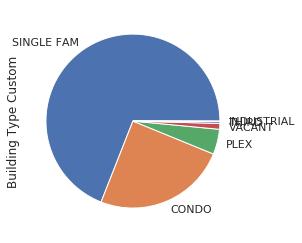

In [64]:
df3329=df1[df1.Neighborhood=='3329']
df3329['Building Type Custom'].value_counts().plot.pie()

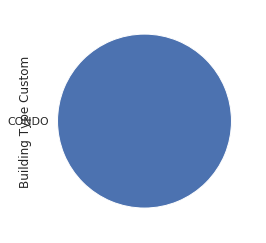

In [65]:
df6934=df1[df1.Neighborhood=='6934']
df6934['Building Type Custom'].value_counts().plot.pie()